## 1.	Explain the dot product and cross product in your own words in markdown. Use LaTeX to properly show the equations.

Dot product is a operation of getting the product of two equal-length vectors, returning a single number. Dot Product formula = $$\vec{a} \cdot \vec{b}=\left |  \vec{a} \right |\left | \vec{b} \right |\cos\theta $$

Cross product is a operation between two equal-length vectors that measures how much the vectors point in different directions. Instead of returning a number it returns a matrix. Cross Product formula = $$\vec{a}\times\vec{b}$$

## 2. Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated. 

In [29]:
import numpy as np
import numpy.linalg as la
from scipy.stats import norm
import scipy.optimize
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def angle_between (v1,v2):
    v1=np.ravel(v1)  #creates 1D array otherwise an array not a scalar product will not be genrated 
    v2=np.ravel(v2)
    inner = np.inner(v1, v2) #calcutes the inner poducts
    norms = la.norm(v1) * la.norm(v2) # calcultes len / magnitude of vector 
    angle = inner / norms # dot product calculation
    rad = np.arccos(angle) # inverse cos, np clip limits the array 
    deg = np.rad2deg(rad) # coverts radians to degrees 
    return (rad, deg) 

v1=np.array([[-1,4,3]])
v2=np.array([[0,8,2]])
angle_between(v1,v2)

(0.4423742229767446, 25.346175941946676)

## 3.	Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0)

In [3]:
def row_dot(A, r1, r2):
    return np.dot(A[r1],A[r2])


C=np.array([[0,0,1],[1,0,0], [0,1,0]]) 
print(row_dot(C,C[0],C[1]))
print(row_dot(C,C[1],C[2]))

[[0 0 1]
 [0 0 1]
 [1 0 0]]
[[0 0 1]
 [0 0 1]
 [0 0 1]]


##  4.	Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?

Matrix division does not exist. We need to multiply one matrix by the inverse of the other

In [4]:
#Another method from study group using dot product 

def matrix_division (m1, m2):
    m2_n=np.array([])
    m2_n=la.inv(m2) 
    result= np.dot(m1,m2_n) #dot product of m1 inverse of m2
    return result 

In [21]:
F=([[5,8,4,1], [1,2,3,4],    
   [13,4,1,8], [11,5,7,4]])
G=([[5,8,4,1], [1,2,3,4],
   [7,4,1,8], [1,5,1,1]])
matrix_division(F,G)

array([[ 0.78947368, -1.22105263,  0.35789474, -0.26315789],
       [-0.03508772, -0.0877193 , -0.02631579,  1.12280702],
       [ 2.05263158,  0.98947368, -0.11052632, -2.10526316],
       [-1.54385965,  0.62280702,  0.45438596,  0.49122807]])

In [7]:
#def matrix_division (m1, m2):
    #m2_n=la.inv(m2) #inverse of the matrix
    #result= (m1*m2_n) #multiply m1 by inverse of m2
   # return result 


#matrix must be square to work
#D=([[5,8,4,1], [1,2,3,4],    
  # [7,4,1,8], [11,5,7,4]])
#E=([[5,8,4,1], [1,2,3,4],
   #[7,4,1,8], [1,5,1,1]])
#matrix_division(D,E)

## 5.	Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol, and 0 otherwise. 

In [8]:
def is_orthogonal(v1,v2,tol):
    v1=np.ravel(v1)  #creates 1D array otherwise an array not a scalar product will not be genrated 
    v2=np.ravel(v2)
    inner = np.inner(v1, v2) #calcutes the inner poducts
    norms = la.norm(v1) * la.norm(v2) # calcultes len / magnitude of vector 
    angle = inner / norms # dot product calculation
    rad = np.arccos(angle) # inverse cos, np clip limits the array 
    if (abs(np.pi/2-rad)<=tol).any(): #absolute value π/2−θ tol=tolerance is a stop 
        return 1
    else:
        return 0

In [9]:
#Sample outputs
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])
# output: 1
print("output 1:", is_orthogonal(a,b, 0.01))

# output: 0
print("output 2:",is_orthogonal(a,b, 0.001))

# output: 0
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
print("output 3:",is_orthogonal(a,b, 0.01))

# output: 1
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
print("output 4:",is_orthogonal(a,b, 1e-10))

output 1: 1
output 2: 0
output 3: 0
output 4: 1


##  6.	Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 1 and 4 above (angle_between and is_orthogonal). Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 1 and 4. 

In [10]:
def __init__(self,vector1,vector2):
    self.v1=np.ravel(vector1)
    self.v2=np.ravel(vector2)

def angle_between (v1,v2):
    v1=np.ravel(v1)  
    v2=np.ravel(v2)
    inner = np.inner(v1, v2) 
    norms = la.norm(v1) * la.norm(v2) 
    angle = inner / norms 
    rad = np.arccos(angle) 
    return (rad) 

def is_orthogonal(v1,v2,tol):
    v1=np.ravel(v1)   
    v2=np.ravel(v2)
    inner = np.inner(v1, v2) 
    norms = la.norm(v1) * la.norm(v2) 
    angle = inner / norms 
    rad = np.arccos(angle) 
    if (abs(np.pi/2-rad)<=tol).any(): 
        return 1
    else:
        return 0

In [30]:
v3=np.array([[-1,4,3]])
v4=np.array([[0,8,2]])
print(angle_between(v3,v4))
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])
# output: 1
print("output a:", is_orthogonal(a,b, 0.01))

0.4423742229767446
output a: 1


##  7.	Show a graphical representation of the breast cancer data outlined in this reading https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers!

Principal component analysis reduces the dimensions of a data set to allow for faster processing of algorithms, and  plotting in 2-3d for better visualizations and easier data exploration. 

In [12]:
breast = load_breast_cancer()
breast_data = breast.data

<function matplotlib.pyplot.show(close=None, block=None)>

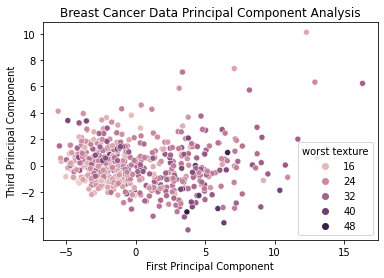

In [31]:
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_df = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_df.columns = features_labels
breast_df['label'].replace(0, 'Benign',inplace=True)
breast_df['label'].replace(1, 'Malignant',inplace=True)
from sklearn.preprocessing import StandardScaler
b = breast_df.loc[:, features].values 
b = StandardScaler().fit_transform(b) # normalizing the features
feat_cols = ['feature'+str(i) for i in range(b.shape[1])]
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=3)
principalComponents_breast = pca_breast.fit_transform(b)
normalised_breast = pd.DataFrame(b,columns=feat_cols)
pcb = pd.DataFrame(data = principalComponents_breast, columns = ['pca1', 'pca2', 'pca3'])
#ax = plt.figure(figsize=(12,8))
sns.scatterplot(x=pcb['pca1'], y=pcb['pca3'], hue=breast_df['worst texture'])
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.title("Breast Cancer Data Principal Component Analysis")
plt.show